# Data Analysis Internship Task 4

# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [23]:
df=pd.read_csv("/content/Pokemon.csv")


In [22]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [20]:
df.dropna()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [19]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


# Data Cleaning

In [18]:
df['Type 2'] = df['Type 2'].fillna("None")
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


# Grouping Data

# Grouping & Count by Category (Type 1)

In [17]:
count_type1 = df.groupby('Type 1')['Name'].count()
print(count_type1)

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Name, dtype: int64


# Total  Another Category (Generation)

In [16]:
total_by_gen = df.groupby('Generation')[['Total', 'HP', 'Attack', 'Defense',
                                         'Sp. Atk', 'Sp. Def', 'Speed']].sum()
print(total_by_gen)

            Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Generation                                                        
1           70851  10926   12722    11763    11922    11469  12049
2           44338   7548    7635     7779     6990     7834   6552
3           69796  10647   13060    11856    12129    11396  10708
4           55541   8843   10027     9454     9245     9340   8632
5           71773  11845   13541    11934    11878    11342  11233
6           35783   5598    6216     6288     6092     6141   5448


# Group by Multiple Categories

In [15]:
grouped = df.groupby(['Type 1','Legendary'])[['Total','HP','Attack']].mean()
print(grouped.head())

                       Total          HP      Attack
Type 1 Legendary                                    
Bug    False      378.927536   56.884058   70.971014
Dark   False      432.344828   64.655172   86.862069
       True       640.000000   98.000000  110.500000
Dragon False      476.850000   72.650000  103.400000
       True       673.333333  101.083333  126.666667


# Average Pokémon Stats by Primary Type (Type 1)

In [13]:
avg_stats_type1 = df.groupby('Type 1').mean(numeric_only=True)
print(avg_stats_type1.head())

                   #       Total         HP      Attack    Defense    Sp. Atk  \
Type 1                                                                          
Bug       334.492754  378.927536  56.884058   70.971014  70.724638  53.869565   
Dark      461.354839  445.741935  66.806452   88.387097  70.225806  74.645161   
Dragon    474.375000  550.531250  83.312500  112.125000  86.375000  96.843750   
Electric  363.500000  443.409091  59.795455   69.090909  66.295455  90.022727   
Fairy     449.529412  413.176471  74.117647   61.529412  65.705882  78.529412   

            Sp. Def      Speed  Generation  Legendary  
Type 1                                                 
Bug       64.797101  61.681159    3.217391   0.000000  
Dark      69.516129  76.161290    4.032258   0.064516  
Dragon    88.843750  83.031250    3.875000   0.375000  
Electric  73.704545  84.500000    3.272727   0.090909  
Fairy     84.705882  48.588235    4.117647   0.058824  


# Average Stats by Type 1

In [29]:
avg_stats_type1.to_csv("avg_stats_by_type1.csv")
print(avg_stats_type1.head())

                   #       Total         HP      Attack    Defense    Sp. Atk  \
Type 1                                                                          
Bug       334.492754  378.927536  56.884058   70.971014  70.724638  53.869565   
Dark      461.354839  445.741935  66.806452   88.387097  70.225806  74.645161   
Dragon    474.375000  550.531250  83.312500  112.125000  86.375000  96.843750   
Electric  363.500000  443.409091  59.795455   69.090909  66.295455  90.022727   
Fairy     449.529412  413.176471  74.117647   61.529412  65.705882  78.529412   

            Sp. Def      Speed  Generation  Legendary  
Type 1                                                 
Bug       64.797101  61.681159    3.217391   0.000000  
Dark      69.516129  76.161290    4.032258   0.064516  
Dragon    88.843750  83.031250    3.875000   0.375000  
Electric  73.704545  84.500000    3.272727   0.090909  
Fairy     84.705882  48.588235    4.117647   0.058824  


# Aggregation with Multiple Functions by Pokémon Primary Type (Type 1)

In [30]:
agg_stats = df.groupby('Type 1').agg({
    'HP': ['mean', 'max', 'min'],
    'Attack': ['mean', 'sum'],
    'Defense': 'mean',
    'Speed': ['mean', 'max']
})
print(agg_stats.head())


                 HP               Attack          Defense      Speed     
               mean  max min        mean   sum       mean       mean  max
Type 1                                                                   
Bug       56.884058   86   1   70.971014  4897  70.724638  61.681159  160
Dark      66.806452  126  35   88.387097  2740  70.225806  76.161290  125
Dragon    83.312500  125  41  112.125000  3588  86.375000  83.031250  120
Electric  59.795455   90  20   69.090909  3040  66.295455  84.500000  140
Fairy     74.117647  126  35   61.529412  1046  65.705882  48.588235   99


# Export Aggregated Results to CSV

In [31]:
agg_stats.to_csv("final_aggregated_stats.csv")
print(agg_stats.head())

                 HP               Attack          Defense      Speed     
               mean  max min        mean   sum       mean       mean  max
Type 1                                                                   
Bug       56.884058   86   1   70.971014  4897  70.724638  61.681159  160
Dark      66.806452  126  35   88.387097  2740  70.225806  76.161290  125
Dragon    83.312500  125  41  112.125000  3588  86.375000  83.031250  120
Electric  59.795455   90  20   69.090909  3040  66.295455  84.500000  140
Fairy     74.117647  126  35   61.529412  1046  65.705882  48.588235   99


# "After grouping the data, I visualized the distribution of Pokémon by their primary type using a bar chart."

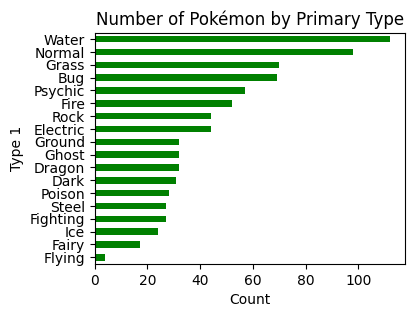

In [47]:
count_type1.sort_values().plot.barh(figsize=(4,3), color="green",
    title="Number of Pokémon by Primary Type")
plt.xlabel("Count")
plt.ylabel("Type 1")
plt.show()

# Pokémon Distribution by Primary Type (Pie Chart)

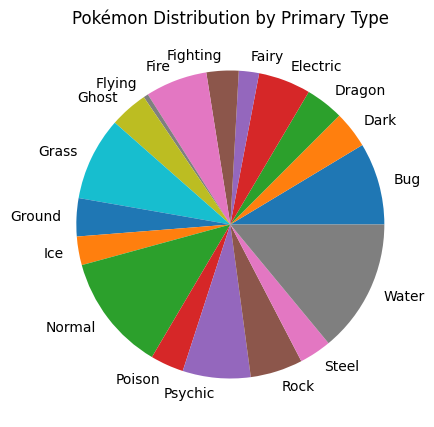

In [42]:
count_type1.plot.pie(figsize=(5,5), ylabel="")
plt.title("Pokémon Distribution by Primary Type")
plt.show()